In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pblcredit-card/creditcard.csv


In [3]:
pip install pandas numpy matplotlib seaborn scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For cleaner plots
sns.set(style='whitegrid')

# Load the dataset (Kaggle environment auto mounts your uploaded file)
df = pd.read_csv('/kaggle/input/pblcredit-card/creditcard.csv')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(df.head())

# Check dataset structure and data types
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


First 5 rows of the dataset:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [5]:
# Step 2: Preprocess 'Amount' and 'Time' columns
from sklearn.preprocessing import StandardScaler

# Create a new dataframe to avoid modifying original df directly
data = df.copy()

# Scale 'Amount' and 'Time'
scaler = StandardScaler()
data['Scaled_Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Scaled_Time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Drop the original columns
data.drop(['Amount', 'Time'], axis=1, inplace=True)

# Reorder the columns to place 'Scaled_Amount' and 'Scaled_Time' at the beginning
scaled_amount = data.pop('Scaled_Amount')
scaled_time = data.pop('Scaled_Time')
data.insert(0, 'Scaled_Amount', scaled_amount)
data.insert(1, 'Scaled_Time', scaled_time)

# Define features and target
X = data.drop('Class', axis=1)
y = data['Class']

print("✅ Data preprocessing complete.")
print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)


✅ Data preprocessing complete.
Shape of features (X): (284807, 30)
Shape of target (y): (284807,)


Class distribution in the full dataset:
Class
0    284315
1       492
Name: count, dtype: int64 

Training set class distribution:
Class
0    227451
1       394
Name: count, dtype: int64 

Test set class distribution:
Class
0    56864
1       98
Name: count, dtype: int64


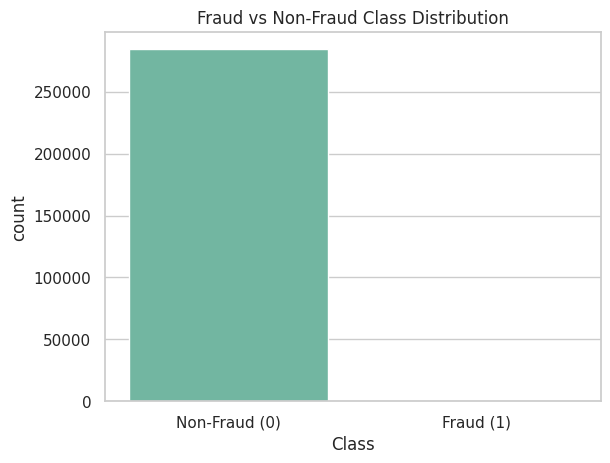

In [6]:
# Step 3: Train-Test Split & Class Imbalance Check
from sklearn.model_selection import train_test_split

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Check distribution of classes in the entire dataset
print("Class distribution in the full dataset:")
print(y.value_counts(), "\n")

# Check distribution in training and test set
print("Training set class distribution:")
print(y_train.value_counts(), "\n")

print("Test set class distribution:")
print(y_test.value_counts())

# Optional: visualize class imbalance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y, palette='Set2')
plt.title("Fraud vs Non-Fraud Class Distribution")
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()


In [7]:
# Step 4: Isolation Forest - Unsupervised Anomaly Detection
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Train the Isolation Forest model
iso_forest = IsolationForest(n_estimators=100, contamination=0.0017, random_state=42)
iso_forest.fit(X_train)

# Predict: -1 means anomaly, 1 means normal
y_pred_iso = iso_forest.predict(X_test)

# Convert predictions to 0 (non-fraud) and 1 (fraud)
y_pred_iso = np.where(y_pred_iso == -1, 1, 0)

# Evaluation
print("🔍 Isolation Forest Evaluation Metrics:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_iso))
print("\nClassification Report:\n", classification_report(y_test, y_pred_iso, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_iso))


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


🔍 Isolation Forest Evaluation Metrics:

Confusion Matrix:
 [[56786    78]
 [   65    33]]

Classification Report:
               precision    recall  f1-score   support

           0     0.9989    0.9986    0.9987     56864
           1     0.2973    0.3367    0.3158        98

    accuracy                         0.9975     56962
   macro avg     0.6481    0.6677    0.6573     56962
weighted avg     0.9976    0.9975    0.9976     56962

ROC AUC Score: 0.6676815000057423


In [ ]:
# Step 5: Support Vector Machine (SVM) - Supervised
from sklearn.svm import SVC

# Train SVM with class_weight to handle imbalance
svm_model = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predict
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print("🔍 SVM Evaluation Metrics:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_svm))


In [ ]:
# Step 6: Random Forest - Supervised Learning
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("🔍 Random Forest Evaluation Metrics:\n")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, digits=4))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred_rf))


In [ ]:
# Step 7: Compare All Models - Summary Table

model_results = {
    "Model": ["Isolation Forest", "SVM", "Random Forest"],
    "Precision (Fraud)": [0.2973, 0.3047, 0.9605],
    "Recall (Fraud)": [0.3367, 0.7959, 0.7449],
    "F1-Score (Fraud)": [0.3158, 0.4407, 0.8391],
    "ROC AUC": [0.6677, 0.8964, 0.8724]
}

results_df = pd.DataFrame(model_results)
display(results_df)


In [ ]:
from sklearn.metrics import confusion_matrix

# 1. True Positives for Isolation Forest
cm_iso = confusion_matrix(y_test, y_pred_iso)
tp_iso = cm_iso[1, 1]  # row 1 (actual fraud), column 1 (predicted fraud)

# 2. True Positives for SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
tp_svm = cm_svm[1, 1]

# 3. True Positives for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
tp_rf = cm_rf[1, 1]


In [ ]:
# Plotting the number of frauds detected (True Positives)
plt.figure(figsize=(8, 6))
sns.barplot(x=["Isolation Forest", "SVM", "Random Forest"],
            y=[tp_iso, tp_svm, tp_rf],
            palette="coolwarm")

plt.title("Number of Fraud Transactions Detected by Each Model")
plt.ylabel("Number of True Positives (Frauds Detected)")
plt.xlabel("Model")
plt.ylim(0, max(tp_iso, tp_svm, tp_rf) + 10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Function to extract TP, TN, FP, FN from confusion matrix
def get_metrics(cm):
    tn, fp, fn, tp = cm.ravel()
    return tp, tn, fp, fn

# Isolation Forest
cm_iso = confusion_matrix(y_test, y_pred_iso)
tp_iso, tn_iso, fp_iso, fn_iso = get_metrics(cm_iso)

# SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
tp_svm, tn_svm, fp_svm, fn_svm = get_metrics(cm_svm)

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
tp_rf, tn_rf, fp_rf, fn_rf = get_metrics(cm_rf)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Bar values
models = ["Isolation Forest", "SVM", "Random Forest"]
TP = [tp_iso, tp_svm, tp_rf]
TN = [tn_iso, tn_svm, tn_rf]
FP = [fp_iso, fp_svm, fp_rf]
FN = [fn_iso, fn_svm, fn_rf]

# Positioning
x = np.arange(len(models))
width = 0.2

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*width, TP, width, label='True Positives (Frauds Detected)', color='green')
plt.bar(x - 0.5*width, TN, width, label='True Negatives (Non-Frauds Detected)', color='blue')
plt.bar(x + 0.5*width, FP, width, label='False Positives (Wrong Fraud Flags)', color='orange')
plt.bar(x + 1.5*width, FN, width, label='False Negatives (Missed Frauds)', color='red')

# Labels
plt.ylabel("Number of Transactions")
plt.title("Classification Results by Model")
plt.xticks(x, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
